In [198]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [199]:
ticker = "^BVSP"
inicio = "2015-01-01"
fim = "2024-02-01"

In [200]:
df = pdr.get_data_yahoo(ticker, start=inicio, end=fim)

c:\Users\mario\anaconda3\envs\Trading\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [201]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-25,127815.0,128697.0,127803.0,128169.0,128169.0,8757600
2024-01-26,128196.0,129252.0,127869.0,128967.0,128967.0,8508000
2024-01-29,128970.0,129068.0,127853.0,128503.0,128503.0,8764500
2024-01-30,128492.0,128492.0,127105.0,127402.0,127402.0,10037400
2024-01-31,127402.0,129558.0,127326.0,127752.0,127752.0,12495200


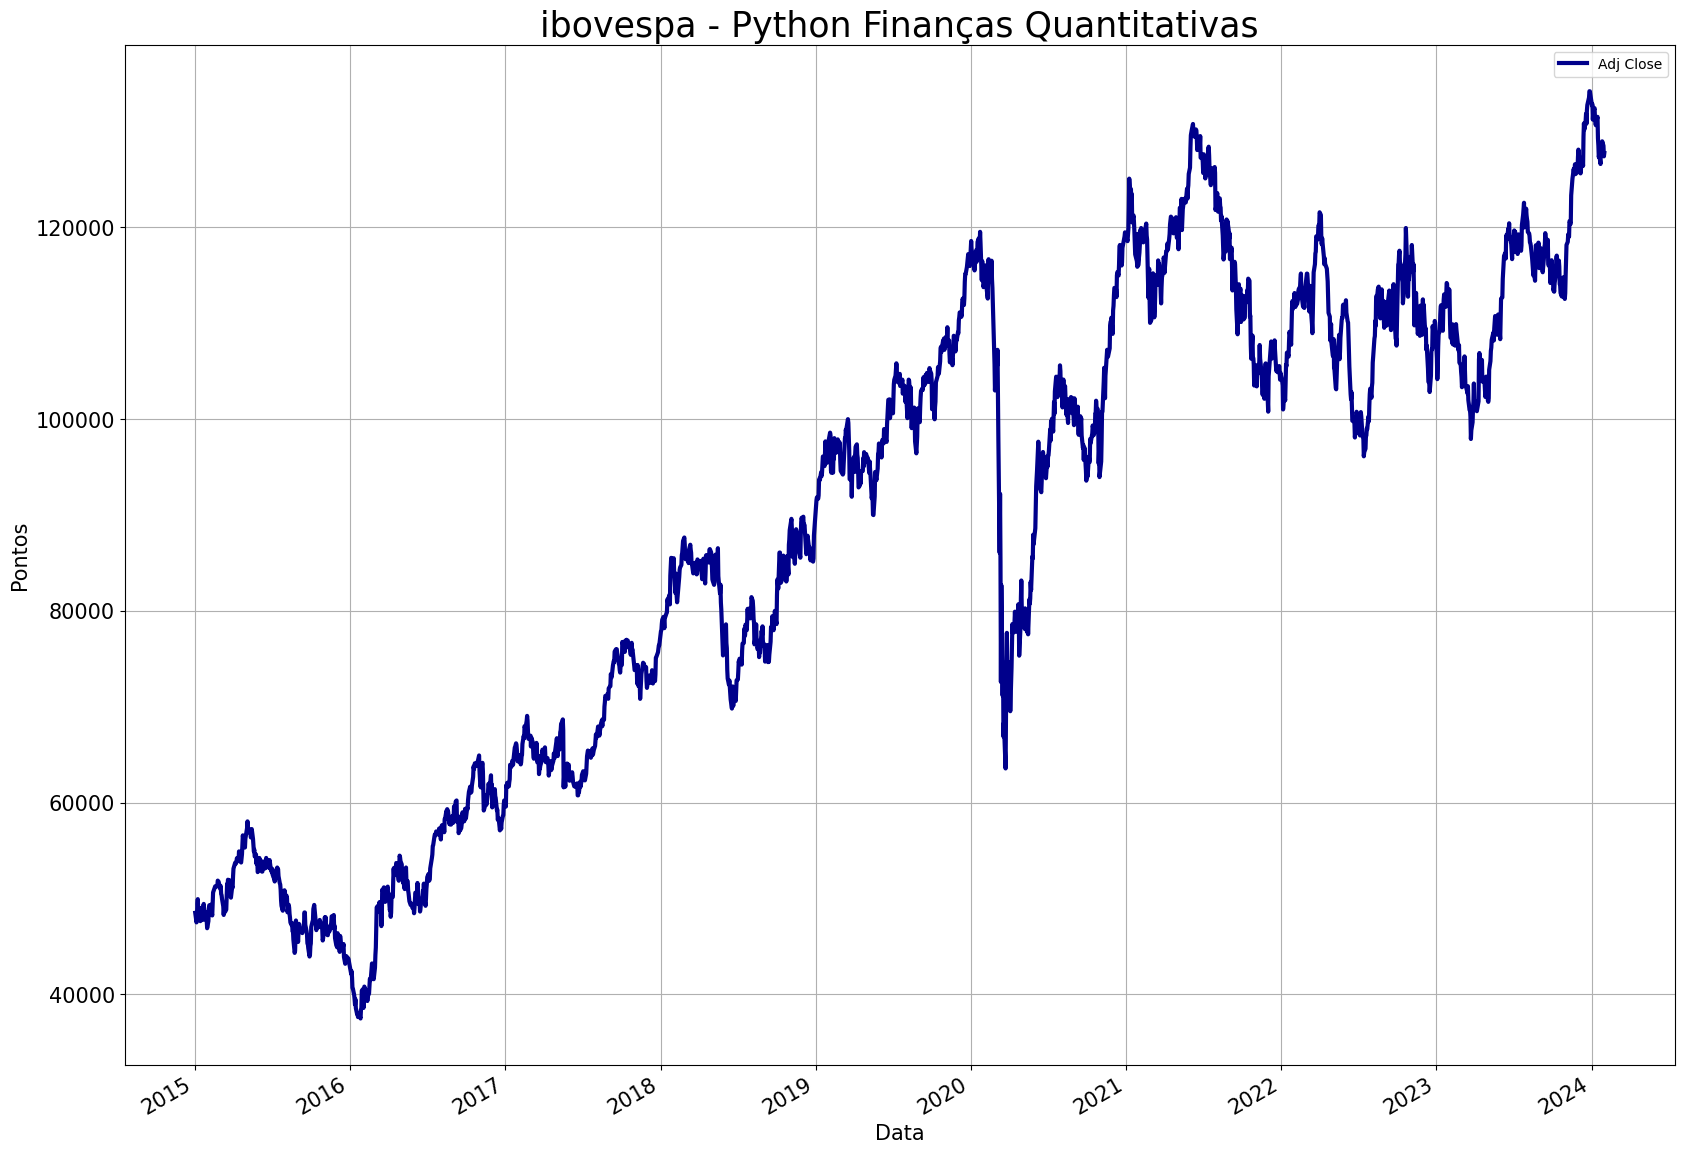

In [202]:
# Primeiro grafico

df["Adj Close"].plot(grid=True, figsize=(20, 15), linewidth=3, fontsize=15, color="darkblue")
plt.xlabel("Data", fontsize=15);
plt.ylabel("Pontos", fontsize=15);
plt.title("ibovespa - Python Finanças Quantitativas", fontsize=25)
plt.legend()

In [203]:
# Calculando as bandas de bollinger

# Parametros iniciais
periodo = 50
desvios = 2

df["desvio"] = df["Adj Close"].rolling(periodo).std()
df["MM"] = df["Adj Close"].rolling(periodo).mean()
df["Banda_Sup"] = df["MM"] + (df["desvio"]*desvios)
df["Banda_Inf"] = df["MM"] - (df["desvio"]*desvios)

In [204]:
df = df.dropna(axis=0)

<Axes: xlabel='Date'>

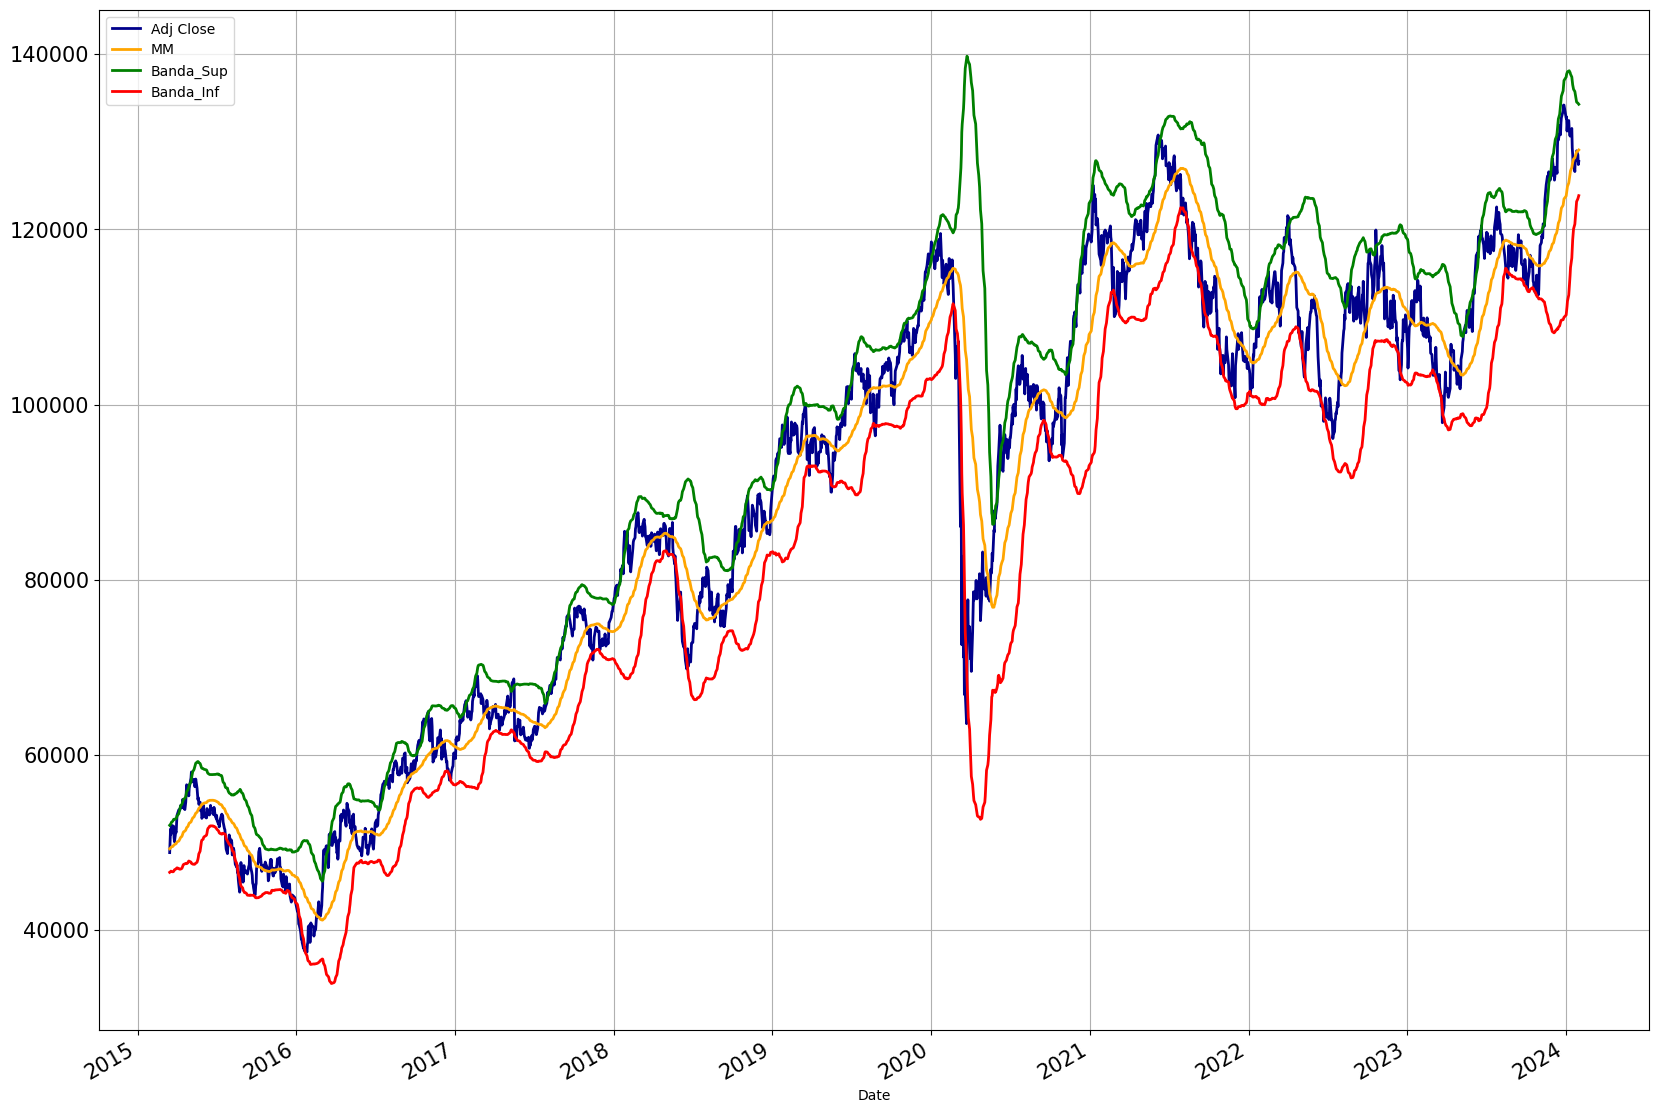

In [205]:
df[["Adj Close", "MM", "Banda_Sup", "Banda_Inf"]].plot(grid=True, figsize=(20,15), linewidth=2, fontsize=15, color=["darkblue", "orange", "green", "red"])

In [206]:
# Construcao do alvo

periodos = 10

# Alvo - Retorno
df.loc[:, "Retorno"] = df["Adj Close"].pct_change(periodos)
df.loc[:, "Alvo"] = df["Retorno"].shift(-periodos);

C:\Users\mario\AppData\Local\Temp\ipykernel_5540\1734511093.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Retorno"] = df["Adj Close"].pct_change(periodos)
C:\Users\mario\AppData\Local\Temp\ipykernel_5540\1734511093.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Alvo"] = df["Retorno"].shift(-periodos);


In [207]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Banda_Sup,Banda_Inf,Retorno,Alvo
Date,,,,,,,,,,,,
2024-01-25,127815.0,128697.0,127803.0,128169.0,128169.0,8757600,3083.410455,128681.36,134848.180909,122514.539091,-0.018982,NaN
2024-01-26,128196.0,129252.0,127869.0,128967.0,128967.0,8508000,2840.990275,128853.18,134535.160550,123171.199450,-0.015429,NaN
2024-01-29,128970.0,129068.0,127853.0,128503.0,128503.0,8764500,2727.596912,128956.68,134411.873825,123501.486175,-0.022947,NaN
2024-01-30,128492.0,128492.0,127105.0,127402.0,127402.0,10037400,2663.496275,129013.20,134340.192550,123686.207450,-0.014633,NaN
2024-01-31,127402.0,129558.0,127326.0,127752.0,127752.0,12495200,2608.660341,129067.00,134284.320682,123849.679318,-0.006007,NaN


In [208]:
df = df.dropna(axis=0)

In [209]:
# Criando a regra de trade

df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] > df.loc[:, "Banda_Sup"], 1, 0)
df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] < df.loc[:, "Banda_Inf"], -1, df.loc[:, "Regra"])

In [210]:
# Aplicando  a regra no alvo

df.loc[:, "Trade"] = df.loc[:, "Regra"] * df.loc[:, "Alvo"]

In [211]:
# Calculando o resultado acumulado em juros simples

df.loc[:, "Retorno_Trade_BB"] = df["Trade"].cumsum()

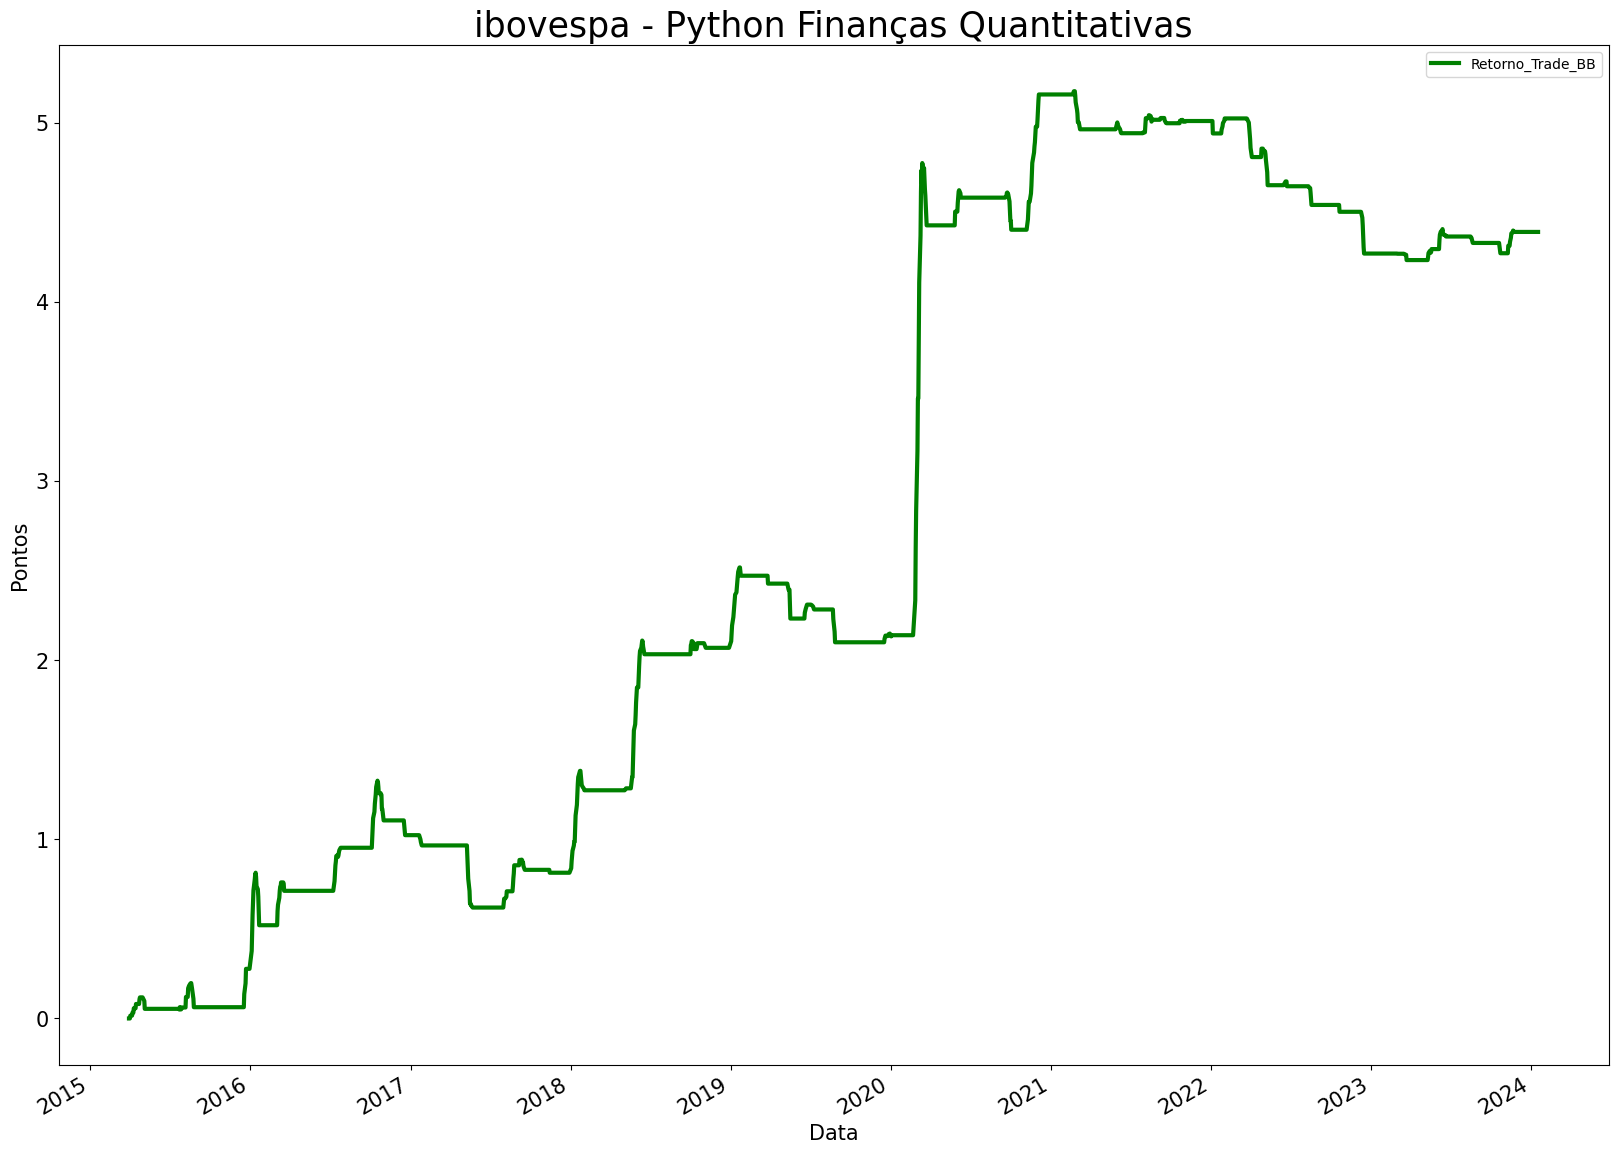

In [212]:
df["Retorno_Trade_BB"].plot(figsize=(20,15), linewidth=3, fontsize=15, color="green")
plt.xlabel("Data", fontsize=15);
plt.ylabel("Pontos", fontsize=15);
plt.title("ibovespa - Python Finanças Quantitativas", fontsize=25)
plt.legend();